In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from dask.distributed import Client
from glob import glob
from datetime import date, timedelta
import os

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 250.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38639,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 250.00 GiB
Comm: tcp://127.0.0.1:44113,Total threads: 4
Dashboard: /proxy/46327/status,Memory: 62.50 GiB
Nanny: tcp://127.0.0.1:44899,


In [3]:
exp = '01deg_jra55v140_iaf_cycle4_MWpert'
path_output = '/g/data/e14/cs6673/meltwater/data_SWMT/'

In [4]:
list_output = sorted(glob(
    path_output + 'volume_transport_across_1000m_isobaths_' +
    exp + '_1d_*-*.nc'))
list_output_dates = [w[-13:-3] for w in list_output]

In [5]:
list_output_dates[:20]

['1992-01-01',
 '1992-01-02',
 '1992-01-03',
 '1992-01-04',
 '1992-01-05',
 '1992-01-06',
 '1992-01-07',
 '1992-01-08',
 '1992-01-09',
 '1992-01-10',
 '1992-01-11',
 '1992-01-12',
 '1992-01-13',
 '1992-01-14',
 '1992-01-15',
 '1992-01-16',
 '1992-01-17',
 '1992-01-18',
 '1992-01-19',
 '1992-01-20']

In [6]:
sdate = date(1992, 1, 1)
edate = date(2018, 12, 31)
delta = edate - sdate
list_all_dates = []
for i in range(delta.days + 1):
    if list_all_dates == []:
        list_all_dates = [(sdate + timedelta(days=i)).strftime("%Y-%m-%d")]
    else:
        list_all_dates.append((sdate + timedelta(days=i)).strftime("%Y-%m-%d"))

In [7]:
list_all_dates[:12]

['1992-01-01',
 '1992-01-02',
 '1992-01-03',
 '1992-01-04',
 '1992-01-05',
 '1992-01-06',
 '1992-01-07',
 '1992-01-08',
 '1992-01-09',
 '1992-01-10',
 '1992-01-11',
 '1992-01-12']

In [8]:
list_missing = set(list_all_dates).difference(list_output_dates)

In [9]:
list_missing

set()

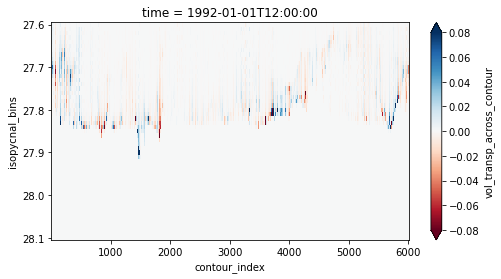

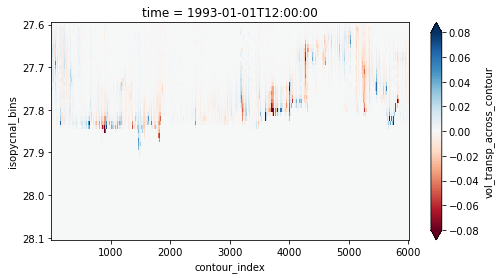

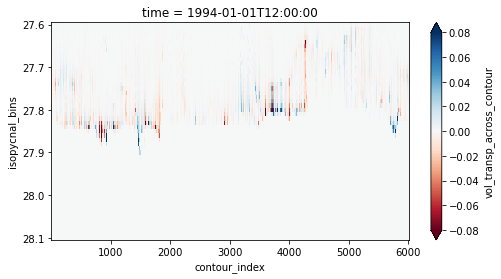

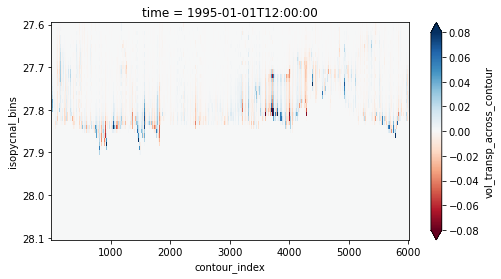

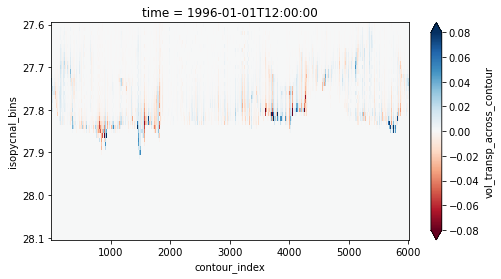

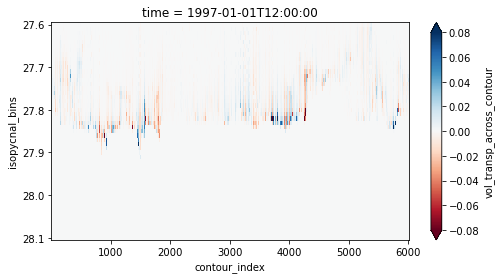

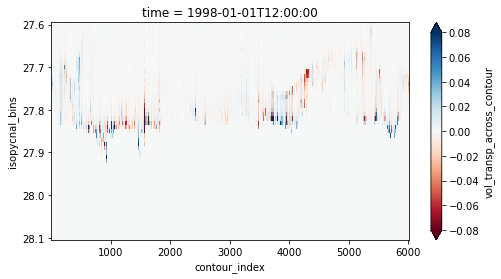

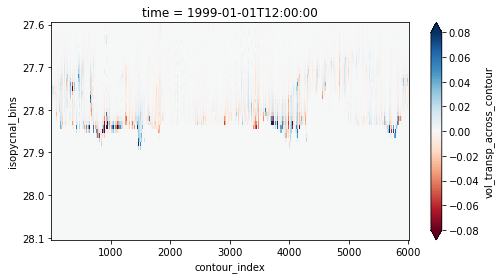

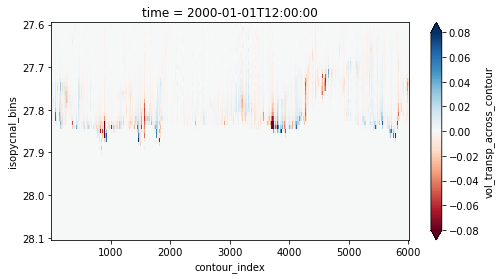

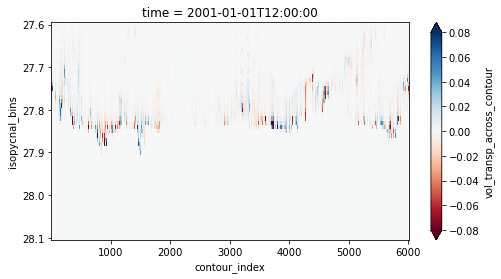

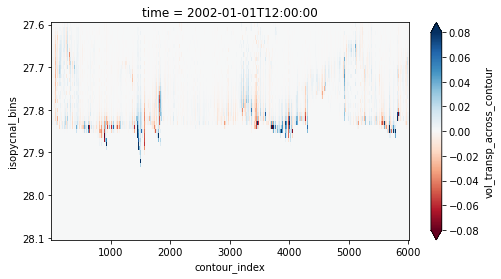

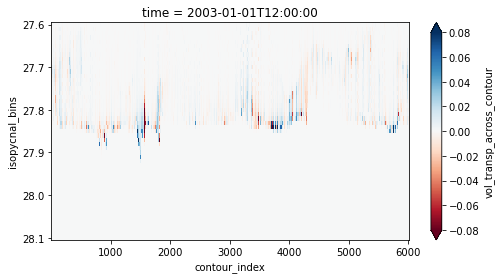

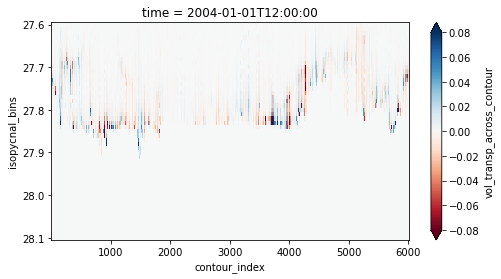

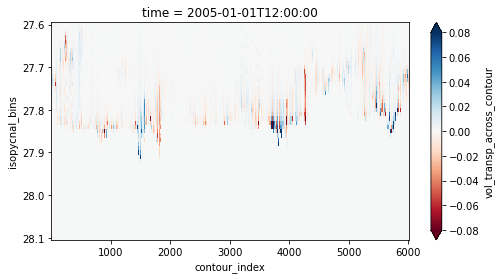

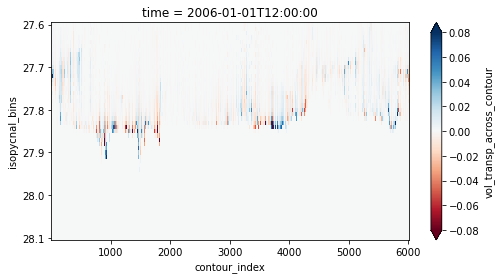

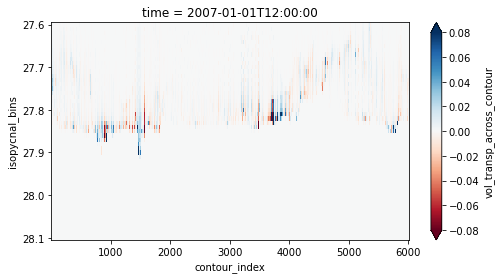

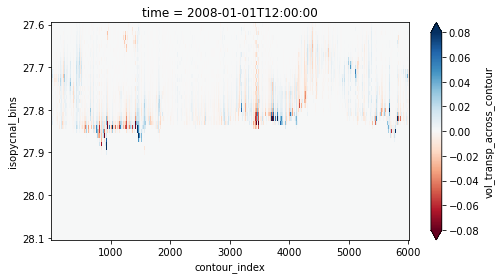

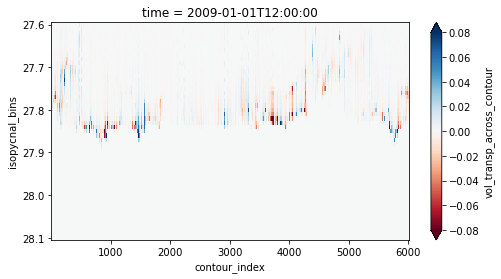

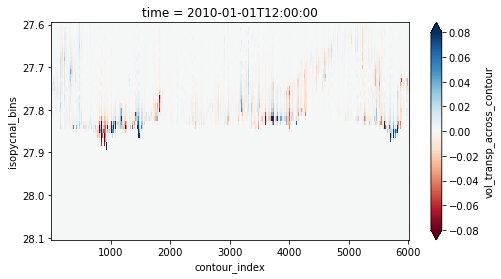

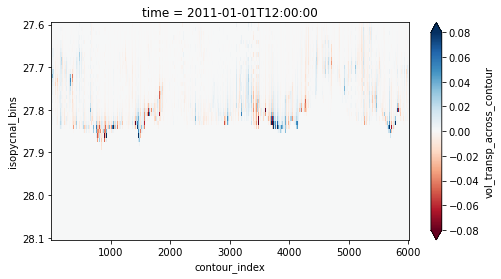

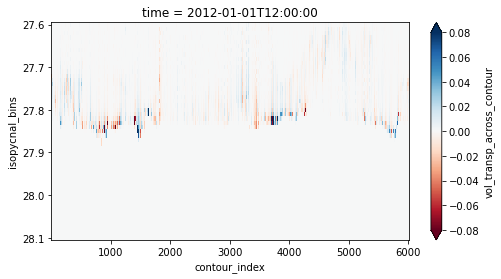

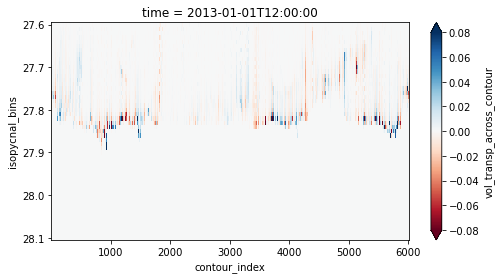

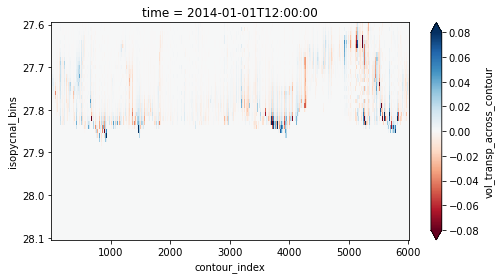

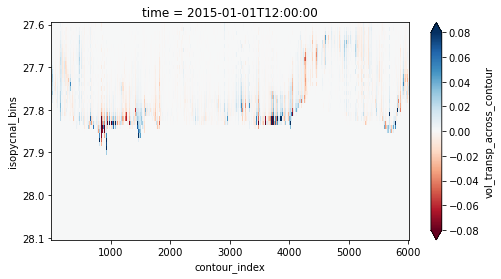

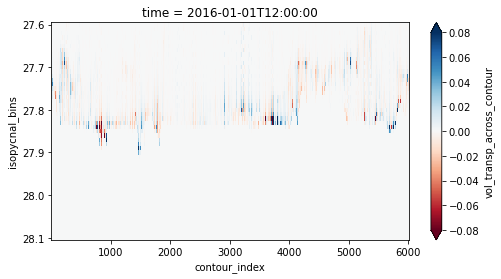

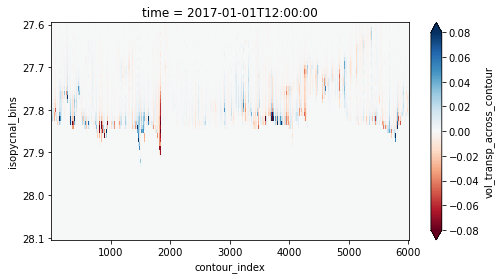

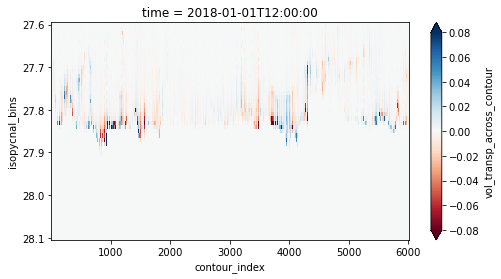

CPU times: user 4min 46s, sys: 1min 18s, total: 6min 4s
Wall time: 13min 46s


In [11]:
%%time
for year in range(1992, 2019):
    ds = xr.open_mfdataset(path_output + 'volume_transport_across_1000m_isobaths_' +
                           exp + '_1d_' + str(year) + '-*.nc')
    ds.to_netcdf(path_output + 'volume_transport_across_1000m_isobaths_' +
                 exp +  '_1d_' + str(year) + '.nc')
    ds_new = xr.open_dataset(path_output + 'volume_transport_across_1000m_isobaths_' +
                             exp + '_1d_' + str(year) + '.nc')
    plt.figure(figsize=(8, 4))
    (ds_new.vol_transp_across_contour[0, :, :]*1e-6).plot(vmin=-.08, vmax=.08, cmap='RdBu')
    plt.gca().invert_yaxis()
    plt.show()

    for f in glob(path_output +  'volume_transport_across_1000m_isobaths_' +
                  exp + '_1d_' + str(year) + '-*.nc'):
        os.remove(f)